C:\Users\riyaz\AppData\Local\Temp\ipykernel_24848\827162011.py:203: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\riyaz\AppData\Local\Temp\ipykernel_24848\827162011.py:277: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0.09, 1, 0.95])


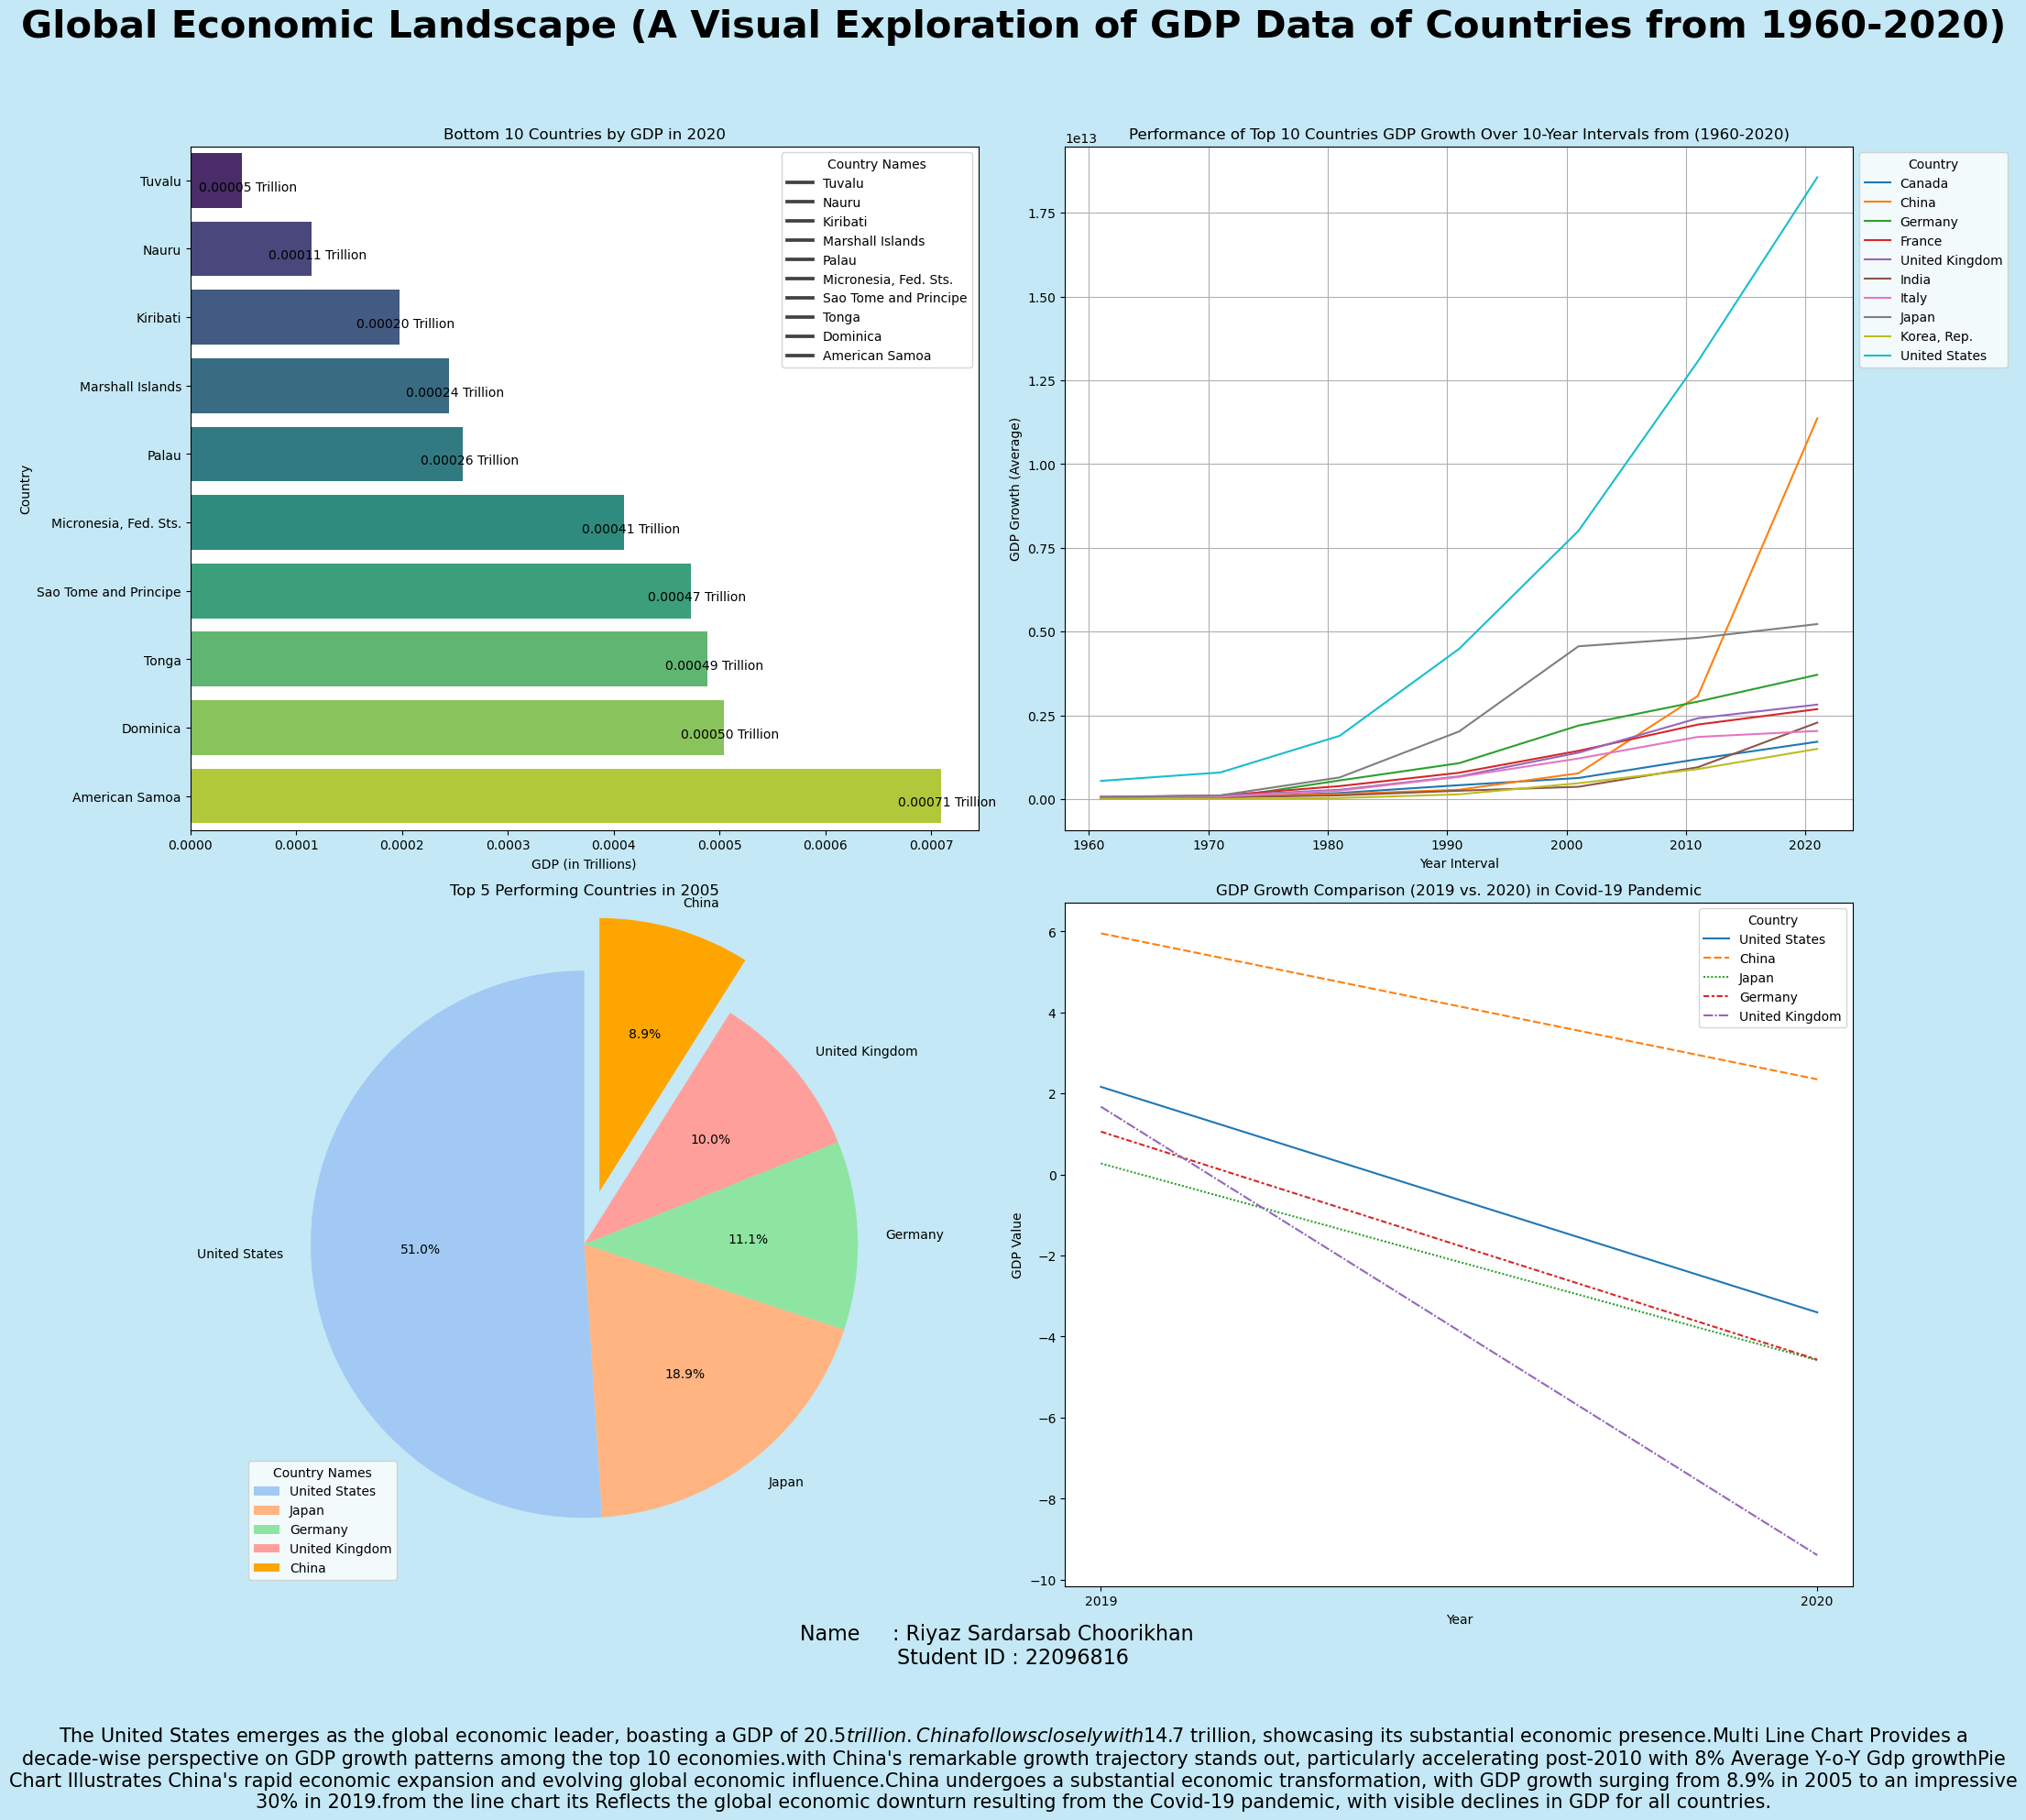

In [3]:
"""
DHV Assignment: Infographics Project
Git hub link: https://github.com/riyazchoorikhanrk/DHV-Assignment
Student number: 22096816
Data Source:  https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths/code

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("gdp.csv")  # gdp

df2 = pd.read_csv("gdp_growth.csv")  # gdp_growth

# Data Cleaning
# Example: Handling Missing Values
df1.fillna(0, inplace=True)  # Replace NaN values with 0, you might choose a
# different strategy
df2.fillna(0, inplace=True)

# Deleting the 'Unnamed: 65' column

df1 = df1.drop("Unnamed: 65", axis=1)
df2 = df2.drop("Unnamed: 65", axis=1)

# Rename the 'OldColumnName' to 'NewColumnName'
df1 = df1.rename(columns={'Country Name': 'Country_Name'})
df2 = df2.rename(columns={'Country Name': 'Country_Name'})

# Summary statistics using pandas
df1.describe

# Summary statistics using numpy
gdp_values_2020 = df1['2020']

summary_statistics_numpy_2020 = {
    'mean': np.mean(gdp_values_2020),
    'median': np.median(gdp_values_2020),
    'std_dev': np.std(gdp_values_2020),
    'min': np.min(gdp_values_2020),
    'max': np.max(gdp_values_2020)
}

rows_to_remove = ["Middle income", "North America", "Late-demographic dividend",
                  "Europe & Central Asia", "East Asia & Pacific (excluding high income)", "East Asia & Pacific (IDA & IBRD countries)",
                  "European Union", "Euro area",	"World", "High income", "OECD members",
                  "Post-demographic dividend",
                  "IDA & IBRD total", "Low & middle income", "Middle income	", "IBRD only",
                  "East Asia & Pacific", "Upper middle income"
                  "Early-demographic dividend ", "Lower middle income",
                  "Latin America & Caribbean",
                  "Latin America & the Caribbean (IDA & IBRD countries)",
                  "Latin America & Caribbean (excluding high income)",
                  "Europe & Central Asia (IDA & IBRD countries)",
                  "Early-demographic dividend", "South Asia ", "South Asia (IDA & IBRD)", "Europe & Central Asia (excluding high income)",
                  "Middle East & North Africa" "Early-demographic dividend",
                  "South Asia	", "Arab World", "South Asia", "IDA total", "Sub-Saharan Africa",
                  "Sub-Saharan Africa (IDA & IBRD countries)	",
                  "Sub-Saharan Africa (IDA & IBRD countries)",
                  "Sub-Saharan Africa (excluding high income)	",
                  "Sub-Saharan Africa (excluding high income)"
                  "Central Europe and the Baltics",
                  "Sub-Saharan Africa (excluding high income)",
                  "Central Europe and the Baltics	", "Central Europe and the Baltics",
                  "Upper middle income", "Middle East & North Africa	", "Middle East & North Africa", "Aruba", "Andorra", "	Channel Islands	", "Eritrea",
                  "Faroe Islands", "Gibraltar", "Greenland", "Isle of Man",
                  "Not classified	", "Liechtenstein",
                  "Channel Islands", "Sint Maarten (Dutch part)	", "South Sudan	", "San Marino", "French Polynesia	", "Korea, Dem. People's Rep.",
                  "New Caledonia", "Northern Mariana Islands	",
                  "St. Martin (French part)", "Not classified", 'Northern Mariana Islands',
                  'French Polynesia',
                  'South Sudan',
                  'Sint Maarten (Dutch part)',
                  'Syrian Arab Republic',
                  'Turkmenistan',
                  'Venezuela, RB',
                  'British Virgin Islands',
                  'Virgin Islands (U.S.)',
                  'Yemen, Rep.']

df1 = df1[~df1['Country_Name'].isin(rows_to_remove)]
df2 = df2[~df2['Country_Name'].isin(rows_to_remove)]


def plot_gdp_comparison(df, ax=None):
    """
    Plots a comparison of GDP for the top and bottom 10 countries in a specified year.

    Parameters:
        df (DataFrame): The DataFrame containing GDP data.
        ax (Axes, optional): The axes on which to plot. If not provided, a new figure will be created.

    Returns:
        None. The function saves the plot as an image file if ax is not provided.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 3))

    gdp_columns = df.columns[2:]
    latest_year = '2020'

    bottom_countries_latest_year = df[[
        'Country_Name', latest_year]].nsmallest(10, latest_year)

    bottom_countries_latest_year[latest_year] = pd.to_numeric(
        bottom_countries_latest_year[latest_year])

    bottom_chart = sns.barplot(x=bottom_countries_latest_year[latest_year] / 1e12,
                               y='Country_Name', data=bottom_countries_latest_year, palette='viridis', ax=ax)
    ax.set_title(f'Bottom 10 Countries by GDP in {latest_year}')
    ax.set_xlabel('GDP (in Trillions)')
    ax.set_ylabel('Country')

    for p in bottom_chart.patches:
        ax.annotate(f'{p.get_width():.5f} Trillion', (p.get_width(),
                                                      p.get_y() + p.get_height() / 2), ha='center', va='top',
                    xytext=(5, 0), textcoords='offset points')

    # Create a legend with country names
    legend_labels = bottom_countries_latest_year['Country_Name'].tolist()
    ax.legend(legend_labels, title='Country Names', loc='upper right')

    plt.subplots_adjust(wspace=0.3)
    plt.tight_layout()


def plot_gdp_growth(df, ax=None):
    """
    Plots the GDP growth over 10-year intervals for the top 5 performing countries in 2020.

    Parameters:
        df (DataFrame): The DataFrame containing GDP data.
        ax (Axes, optional): The axes on which to plot. If not provided, a new figure will be created.

    Returns:
        None. The function saves the plot as an image file if ax is not provided.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 3))

    gdp_columns = df.columns[2:]
    top_countries_2020 = df[['Country_Name', '2020']].nlargest(10, '2020')

    global_gdp_growth_top_countries = df[df['Country_Name'].isin(
        top_countries_2020['Country_Name'])][gdp_columns].T

    global_gdp_growth_top_countries.index = pd.to_datetime(
        global_gdp_growth_top_countries.index)

    global_gdp_growth_10_years = global_gdp_growth_top_countries.resample(
        '10A').mean()

    global_gdp_growth_10_years.columns = df['Country_Name'][global_gdp_growth_10_years.columns].tolist(
    )

    for country in global_gdp_growth_10_years.columns:
        sns.lineplot(x=global_gdp_growth_10_years.index,
                     y=global_gdp_growth_10_years[country], label=country, ax=ax)

    ax.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_title(
        'Performance of Top 10 Countries GDP Growth Over 10-Year Intervals from (1960-2020)')
    ax.set_xlabel('Year Interval')
    ax.set_ylabel('GDP Growth (Average)')
    ax.grid(True)


def plot_china_gdp_growth_comparison(df, ax=None):
    """
    Plots the annual GDP growth comparison of China for the years 2005 and 2019.

    Parameters:
        df (DataFrame): The DataFrame containing GDP data.
        ax (Axes, optional): The axes on which to plot. If not provided, a new figure will be created.

    Returns:
        None. The function saves the plot as an image file if ax is not provided.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 3))

    gdp_growth_2005 = df[['Country_Name'] + ['2005']]

    top_5_countries_2005 = gdp_growth_2005.nlargest(5, '2005', 'all')

    colors_2005 = sns.color_palette('pastel')
    colors_2005[4] = 'orange'
    explode_2005 = (0, 0, 0, 0, 0.2)
    pie_chart = ax.pie(top_5_countries_2005['2005'], labels=top_5_countries_2005['Country_Name'],
                       autopct='%1.1f%%', startangle=90, colors=colors_2005, explode=explode_2005)
    ax.set_title('Top 5 Performing Countries in 2005')

    # Add a legend with country names
    ax.legend(top_5_countries_2005['Country_Name'],
              title='Country Names', loc='lower left')

    # Optionally, set the legend to the side of the pie chart
    # ax.legend(top_5_countries_2005['Country_Name'], title='Country Names', loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()


def plot_gdp_growth_comparison(df, ax=None):
    """
    Plots the GDP growth comparison for specified countries between the years 2019 and 2020.

    Parameters:
        df (DataFrame): The DataFrame containing GDP data with 'Country_Name' as the index.
        ax (Axes, optional): The axes on which to plot. If not provided, a new figure will be created.

    Returns:
        None. The function saves the plot as an image file if ax is not provided.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 3))

    df.set_index('Country_Name', inplace=True)

    countries_of_interest = ["United States",
                             "China", "Japan", "Germany", "United Kingdom"]
    df_countries = df.loc[countries_of_interest, ['2019', '2020']]

    df_countries = df_countries.T

    sns.lineplot(data=df_countries, markers=False, ax=ax)
    ax.set_title('GDP Growth Comparison (2019 vs. 2020) in Covid-19 Pandemic')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP Value')
    ax.legend(title='Country')


# Create a single figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(22, 20))
fig.suptitle("Global Economic Landscape (A Visual Exploration of GDP Data of Countries from 1960-2020)",
             fontsize=30, fontweight='bold')
fig.set_facecolor('#C4E8F5')

# Plot GDP Comparison
plot_gdp_comparison(df1, ax=axes[0, 0])

# Plot GDP Growth
plot_gdp_growth(df1, ax=axes[0, 1])

# Plot China GDP Growth Comparison
plot_china_gdp_growth_comparison(df1, ax=axes[1, 0])

# Plot GDP Growth Comparison
plot_gdp_growth_comparison(df2, ax=axes[1, 1])

# Add a common description
description = (
    "The United States emerges as the global economic leader, boasting a GDP of $20.5 trillion."
    "China follows closely with $14.7 trillion, showcasing its substantial economic presence."

    "Multi Line Chart Provides a decade-wise perspective on GDP growth patterns among the top 10 economies."
    "with China's remarkable growth trajectory stands out, particularly accelerating post-2010 with 8% Average Y-o-Y Gdp growth"

    "Pie Chart Illustrates China's rapid economic expansion and evolving global economic influence."
    "China undergoes a substantial economic transformation, with GDP growth surging from 8.9% in 2005 to an impressive 30% in 2019."

    "from the line chart its Reflects the global economic downturn resulting from the Covid-19 pandemic, with visible declines in GDP for all countries.")

# Add student information
student_info = (
    "     \n\nName     : Riyaz Sardarsab Choorikhan"
    "     \nStudent ID : 22096816"
)

fig.text(0.5, 0.02, description, ha='center',
         va='center', fontsize=15, wrap=True)
fig.text(0.5, 0.1, student_info, ha='center',
         va='center', fontsize=16, wrap=True)

plt.tight_layout(rect=[0, 0.09, 1, 0.95])
plt.savefig("22096816.png", dpi=300)